# **Day 2**

**Task 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_age_notnull = df['Age'] [df['Age'].notnull()]

In [6]:
df_survived_notnull = df['Survived'][df['Survived'].notnull()]
df_survived_notnull

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
df_Fare_notnull = df['Fare'][df['Fare'].notnull()]
df_Fare_notnull

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [8]:
df_Pclass_notnull = df['Pclass'][df['Pclass'].notnull()]
df_Pclass_notnull

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [9]:
df1 = df[['Pclass', 'Fare', 'Survived']]

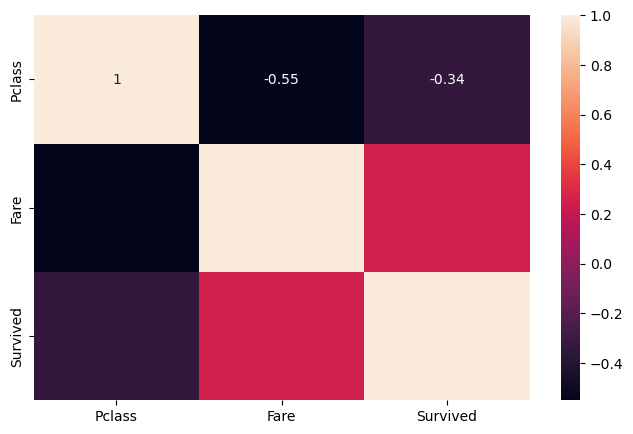

In [10]:
plt.figure(figsize = (8,5))
sns.heatmap(df1.corr(), annot=True);

In [12]:
df_age_notnull = df['Age'] [df['Age'].notnull()]

Finding first quartile and third quartile

In [13]:
q1, q3= np.percentile(df_age_notnull,[25, 75])
print(q1, q3)

20.125 38.0


Find the IQR which is the difference between third and first quartile

In [14]:
iqr = q3 - q1
print(iqr)

17.875


Find lower and upper bound

In [15]:
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)

print(lower_bound)
print(upper_bound)

-6.6875
64.8125


Handling outlier (cuma mau tunjukan datanya bukan drop)

In [16]:
df_age_new = df['Age'][(df['Age'] > lower_bound) & (df['Age'] < upper_bound)]
print(df_age_new)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 703, dtype: float64


# **Day 4**

**Task 1**

- Uji t-test
- Alfa 5%

In [ ]:
df = pd.read_csv('fish.csv')

In [ ]:
#df[['bp_before','bp_after']].describe()
df.head(5)

In [ ]:
df.info()

Dataset mengenai perubahan panjang ikan ketika diberikan perawatan khusus oleh peternak ikan. Akan menggunakan panjang ikan awal (Length1) dan panjang ikan kedua (Length2)

In [ ]:
df[['Length1','Length2']].describe()

In [ ]:
df.shape

In [ ]:
ttest,pval = stats.ttest_rel(df['Length1'], df['Length2'])

print(pval)

In [ ]:
if pval<0.05:
    print("reject nul hypothesis")
else:
    print("accept null hypothesis")

Artinya, perawatan khusus untuk ikan-ikan tersebut mempengaruhi panjang ikan setelah diberikan treatment.

**Task 2**

Membuat story telling dari dataset Titanic yang sudah dibersihkan

In [ ]:
# Create a Dataframe showing the count of survived and not survived passenger by sex
survival_by_sex = df.groupby(['Survived', 'Sex']).size().unstack()

# Print the result
print('Number of Survived passengers:')
print(survival_by_sex)

Dari data diatas menunjukan jumlah penumpang yang selamat dari bencana Titanic, diurutkan berdasarkan jenis kelamin. Secara keseluruhan, terdapat 109 penumpang pria yang selamat dan 223 penumpang wanita yang selamat. Melihat data tersebut terlihat perbedaan yang signifikan dalam tingkat kelangsungan hidup antara pria dan wanita. Jumlah penumpang wanita yang selamat jauh lebih banyak dibanding pria